In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pip install keras

In [3]:
# pip install tensorflow

In [4]:
import tensorflow as tf
from keras import models, layers, optimizers, datasets, utils

In [5]:
# download data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [6]:
# data preprocessing
x_train = x_train.reshape(60000, 784) / 255
x_test = x_test.reshape(10000, 784) / 255

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [103]:
# here is the full connection network
inputs = layers.Input(shape=(784, ))
x = layers.Dense(64, activation = 'sigmoid')(inputs)
x = layers.Dense(64, activation = 'sigmoid')(x)
x = layers.Dense(64, activation = 'selu')(x)
outputs = layers.Dense(10, activation = 'softmax')(x)


# model setting
model = models.Model(inputs = inputs, outputs = outputs)
model.compile(loss = 'categorical_crossentropy', optimizer = 'Nadam', metrics =['accuracy'])

In [104]:
# model fitting
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test)
print(f'Test loss:{score[0]}, test acc: {score[1]}')

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.7018 - accuracy: 0.8097 - val_loss: 0.2874 - val_accuracy: 0.9199
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2456 - accuracy: 0.9277 - val_loss: 0.2075 - val_accuracy: 0.9384
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1854 - accuracy: 0.9455 - val_loss: 0.1632 - val_accuracy: 0.9508
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1485 - accuracy: 0.9555 - val_loss: 0.1414 - val_accuracy: 0.9557
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1234 - accuracy: 0.9627 - val_loss: 0.1257 - val_accuracy: 0.9637
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1042 - accuracy: 0.9686 - val_loss: 0.1208 - val_accuracy: 0.9643
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0905 - accuracy: 0.9722 - val_loss: 0.1059 - val_accuracy: 0.9670
Epoch 

In [44]:
# history.history.keys() -> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

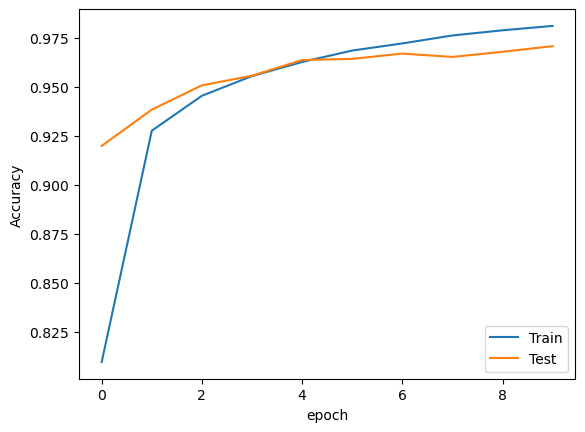

In [105]:
# learning curve plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc = 'lower right')
plt.show()

In [55]:
help(layers.Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern